# Import librariers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [2]:
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm          import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster  import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

from scipy.cluster.hierarchy import dendrogram, ward

In [3]:
# set default values for all plotting:
plt.rcParams['axes.titlesize']  = 14
plt.rcParams['axes.labelsize']  = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True

# Import data

In [4]:
# for offline use load data from the csv files:
X = pd.read_csv('X-Vektor.csv', index_col=0, parse_dates=[0])
Y = pd.read_csv('Y-Vektor.csv', index_col=0, parse_dates=[0])

In [5]:
X

,K2HNE10GH001_ZJ32_Ist_pval,K2LBA10CF901_ZQ51_Ist_pval,K2LAB30CF001_XQ01_Ist_pval,K2HLA20CF901_ZQ51_Ist_pval,K2ECD11AF001_XQ11_Ist_pval,K2ECD12AF001_XQ11_Ist_pval,K2ECD21AF001_XQ11_Ist_pval,K2ECD22AF001_XQ11_Ist_pval
Datetime,,,,,,,,
2020-01-01 00:00:00,1,78.6,82.8,11960,0,0,0,0
2020-01-01 00:01:00,1,78.7,82.7,12176,0,0,0,0
2020-01-01 00:02:00,1,78.8,83.7,12344,0,0,0,0
2020-01-01 00:03:00,1,78.7,83.5,12278,0,0,0,0
2020-01-01 00:04:00,1,78.6,83.6,12252,0,0,0,0
...,...,...,...,...,...,...,...,...
2020-01-31 23:56:00,2,60.7,80.4,11960,0,0,0,0
2020-01-31 23:57:00,2,60.6,79.9,12075,0,0,0,0
2020-01-31 23:58:00,2,60.4,79.9,12048,0,0,0,0


In [6]:
Y

,CHP2_Wirkleistung_Turbine_pval
Datetime,
2020-01-01 00:00:00,13.010
2020-01-01 00:01:00,13.038
2020-01-01 00:02:00,12.940
2020-01-01 00:03:00,12.919
2020-01-01 00:04:00,13.024
...,...
2020-01-31 23:56:00,0.000
2020-01-31 23:57:00,0.000
2020-01-31 23:58:00,0.000


# Rename dataframes

In [7]:
X=X.rename({'K2HNE10GH001_ZJ32_Ist_pval':'CO', 'K2LBA10CF901_ZQ51_Ist_pval':'FD', 'K2LAB30CF001_XQ01_Ist_pval':'SW', 'K2HLA20CF901_ZQ51_Ist_pval':'VL', 'K2ECD11AF001_XQ11_Ist_pval':'BS1L','K2ECD12AF001_XQ11_Ist_pval':'BS2L','K2ECD21AF001_XQ11_Ist_pval':'BS1R', 'K2ECD22AF001_XQ11_Ist_pval':'BS2R'}, axis='columns')
Y=Y.rename({'CHP2_Wirkleistung_Turbine_pval':'P'}, axis='columns')

In [8]:
X

,CO,FD,SW,VL,BS1L,BS2L,BS1R,BS2R
Datetime,,,,,,,,
2020-01-01 00:00:00,1,78.6,82.8,11960,0,0,0,0
2020-01-01 00:01:00,1,78.7,82.7,12176,0,0,0,0
2020-01-01 00:02:00,1,78.8,83.7,12344,0,0,0,0
2020-01-01 00:03:00,1,78.7,83.5,12278,0,0,0,0
2020-01-01 00:04:00,1,78.6,83.6,12252,0,0,0,0
...,...,...,...,...,...,...,...,...
2020-01-31 23:56:00,2,60.7,80.4,11960,0,0,0,0
2020-01-31 23:57:00,2,60.6,79.9,12075,0,0,0,0
2020-01-31 23:58:00,2,60.4,79.9,12048,0,0,0,0


In [9]:
Y

,P
Datetime,
2020-01-01 00:00:00,13.010
2020-01-01 00:01:00,13.038
2020-01-01 00:02:00,12.940
2020-01-01 00:03:00,12.919
2020-01-01 00:04:00,13.024
...,...
2020-01-31 23:56:00,0.000
2020-01-31 23:57:00,0.000
2020-01-31 23:58:00,0.000


# 1) Unsupervised learning

# Get an overview of the data

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

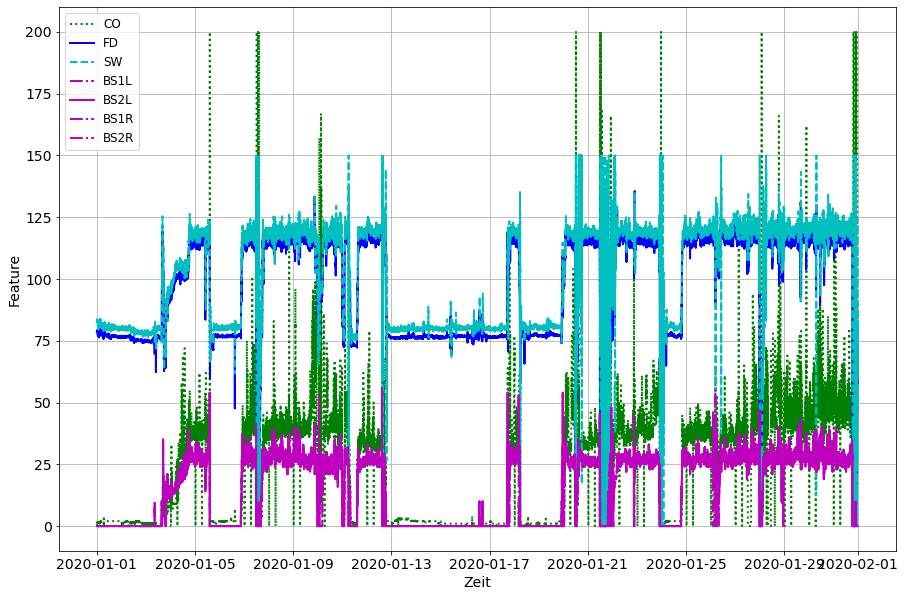

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(X.index,X['CO'], 'g:',label="CO") # CO-Emissionen Minutenwerte
plt.plot(X.index,X['FD'], 'b-',label="FD") # Menge FD
plt.plot(X.index,X['SW'], 'c--',label="SW") # Menge Speisewasser SW
#plt.plot(X.index,X['VL'],label="VL") # Menge Verbrennungsluft Wirbelgas normiert # Sizing crashes plot --> Apply scaling on data ?
plt.plot(X.index,X['BS1L'],'m-.',label="BS1L") # Drehzahl BS Schnecke 1 links
plt.plot(X.index,X['BS2L'],'m-',label="BS2L") # Drehzahl BS Schnecke 2 links
plt.plot(X.index,X['BS1R'],'m-.',label="BS1R") # Drehzahl BS Schnecke 1 rechts
plt.plot(X.index,X['BS2R'],'m-.',label="BS2R") # Drehzahl BS Schnecke 2 rechts
plt.legend()
plt.xlabel("Zeit")
plt.ylabel("Feature")
plt.plot

Text(0, 0.5, 'Power')

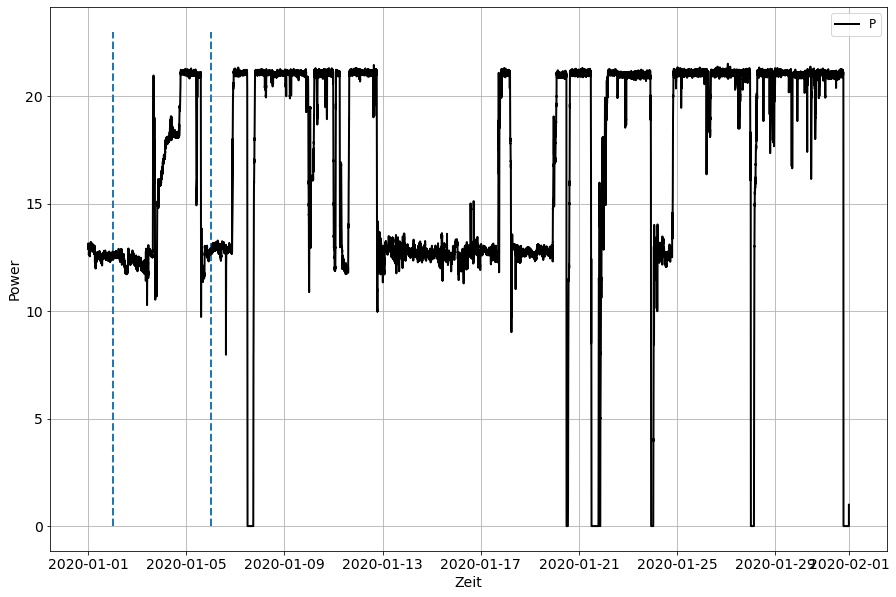

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(Y.index,Y['P'], 'k',label="P")
plt.vlines(Y.index[1440], 0, 23, linestyle='--')
plt.vlines(Y.index[7201], 0, 23, linestyle='--')
plt.legend()
plt.xlabel("Zeit")
plt.ylabel("Power")

In [12]:
X.corr()

,CO,FD,SW,VL,BS1L,BS2L,BS1R,BS2R
CO,1.000000,0.581267,0.586674,0.366763,0.744656,0.748335,0.752435,0.748725
FD,0.581267,1.000000,0.964571,0.536908,0.854399,0.861663,0.861086,0.858794
SW,0.586674,0.964571,1.000000,0.497106,0.843444,0.850846,0.846230,0.843840
VL,0.366763,0.536908,0.497106,1.000000,0.465043,0.461069,0.484746,0.484689
BS1L,0.744656,0.854399,0.843444,0.465043,1.000000,0.992381,0.947785,0.940339
BS2L,0.748335,0.861663,0.850846,0.461069,0.992381,1.000000,0.957484,0.950391
BS1R,0.752435,0.861086,0.846230,0.484746,0.947785,0.957484,1.000000,0.996504
BS2R,0.748725,0.858794,0.843840,0.484689,0.940339,0.950391,0.996504,1.000000


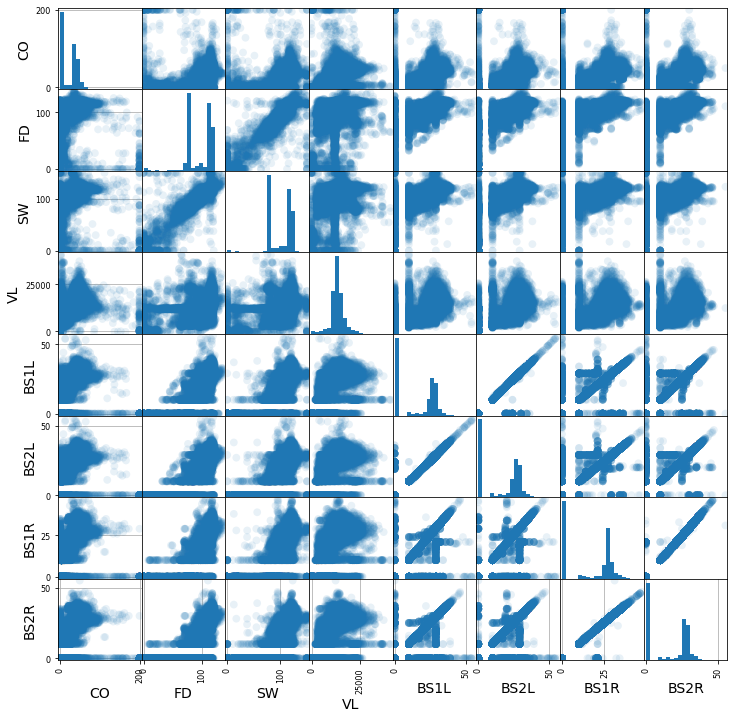

In [13]:
# create a scatter matrix from the X dataframe without target vektor
pd.plotting.scatter_matrix(X,
                           figsize=(12, 12), marker='o', 
                           hist_kwds={'bins': 20}, s=60, alpha=0.1, 
                           cmap=plt.get_cmap('coolwarm'));

# Create XY-Matrix

In [14]:
XY = X
XY=XY.join(Y['P'])
XY.corr()

,CO,FD,SW,VL,BS1L,BS2L,BS1R,BS2R,P
CO,1.000000,0.581267,0.586674,0.366763,0.744656,0.748335,0.752435,0.748725,0.591445
FD,0.581267,1.000000,0.964571,0.536908,0.854399,0.861663,0.861086,0.858794,0.971860
SW,0.586674,0.964571,1.000000,0.497106,0.843444,0.850846,0.846230,0.843840,0.936578
VL,0.366763,0.536908,0.497106,1.000000,0.465043,0.461069,0.484746,0.484689,0.507555
BS1L,0.744656,0.854399,0.843444,0.465043,1.000000,0.992381,0.947785,0.940339,0.841104
BS2L,0.748335,0.861663,0.850846,0.461069,0.992381,1.000000,0.957484,0.950391,0.848019
BS1R,0.752435,0.861086,0.846230,0.484746,0.947785,0.957484,1.000000,0.996504,0.847381
BS2R,0.748725,0.858794,0.843840,0.484689,0.940339,0.950391,0.996504,1.000000,0.844791
P,0.591445,0.971860,0.936578,0.507555,0.841104,0.848019,0.847381,0.844791,1.000000


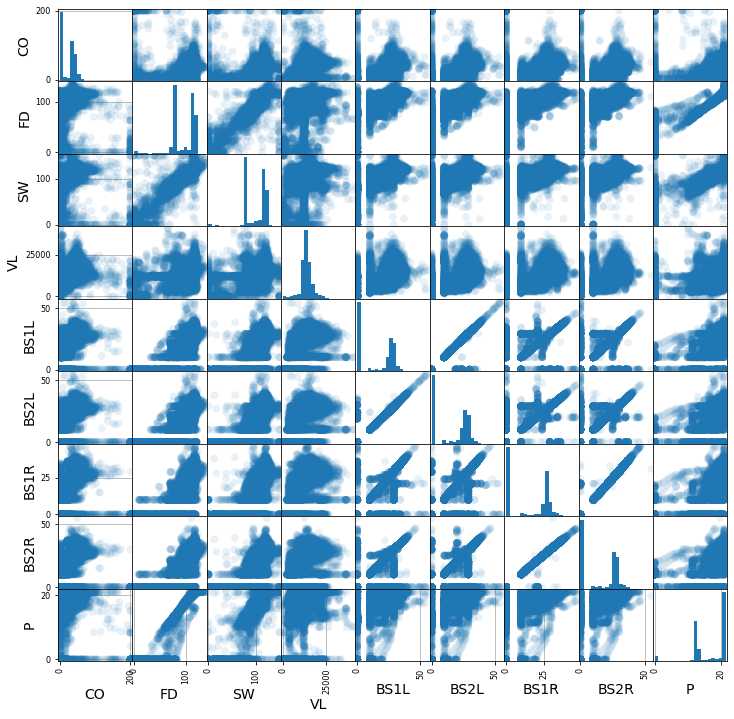

In [15]:
# create a scatter matrix from the dataframe XY with target vektor
pd.plotting.scatter_matrix(XY,
                           figsize=(12, 12), marker='o', 
                           hist_kwds={'bins': 20}, s=60, alpha=0.1, 
                           cmap=plt.get_cmap('coolwarm'));

# Slice dataset to applicable data size of 4 days

In [16]:
X1 = X.iloc[1440:7201]
Y1= Y.iloc[1440:7201]

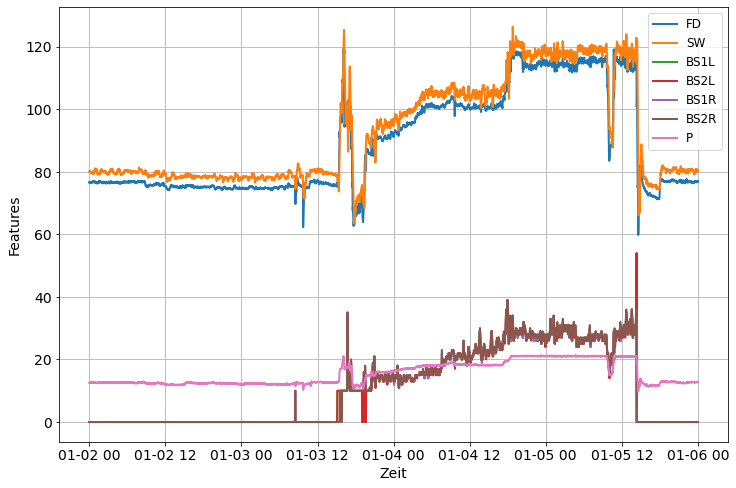

In [17]:
plt.figure(figsize=(12, 8))
#plt.plot(X1.index,X1['CO']) # CO-Emissionen Minutenwerte
plt.plot(X1.index,X1['FD'],label="FD") # Menge FD
plt.plot(X1.index,X1['SW'],label="SW") # Menge Speisewasser SW
#plt.plot(X1.index,X1['VL'],label="VL") # Menge Verbrennungsluft Wirbelgas normiert
plt.plot(X1.index,X1['BS1L'],label="BS1L") # Drehzahl BS Schnecke 1 links
plt.plot(X1.index,X1['BS2L'],label="BS2L") # Drehzahl BS Schnecke 2 links
plt.plot(X1.index,X1['BS1R'],label="BS1R") # Drehzahl BS Schnecke 1 rechts
plt.plot(X1.index,X1['BS2R'],label="BS2R") # Drehzahl BS Schnecke 2 rechts
plt.plot(X1.index,Y1['P'],label="P")
plt.xlabel("Zeit")
plt.ylabel("Features")
plt.legend()

Text(0, 0.5, 'Power')

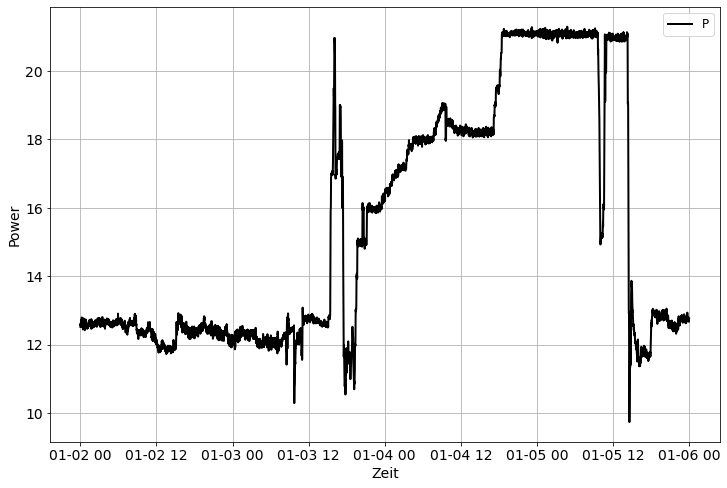

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(Y1.index,Y1['P'], 'k', label='P')
plt.legend()
plt.xlabel("Zeit")
plt.ylabel("Power")

# Create XY1-Matrix of sliced data-set

In [19]:
XY1 = X1
XY1=XY1.join(Y['P'])
XY1.shape

(5761, 9)

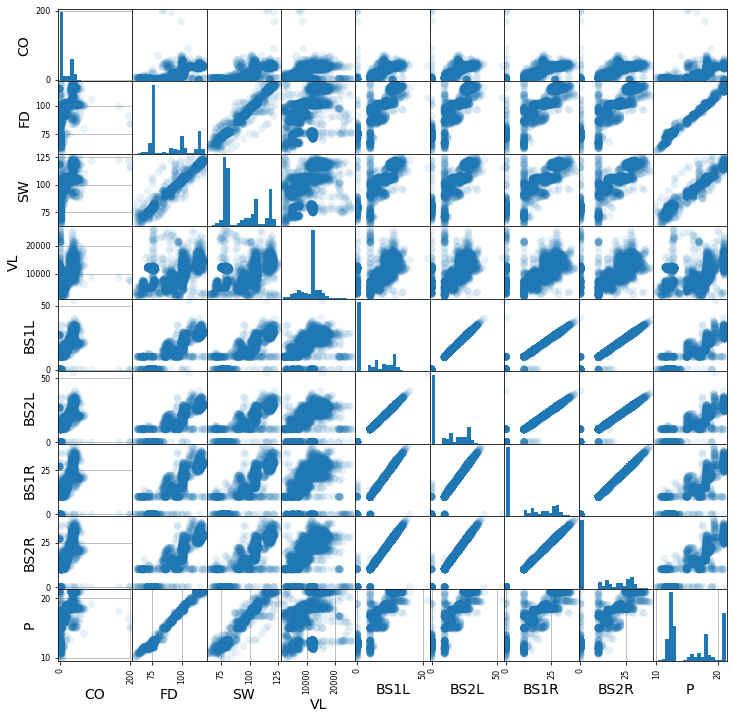

In [20]:
# create a scatter matrix from the dataframe XY with target vektor
pd.plotting.scatter_matrix(XY1,
                           figsize=(12, 12), marker='o', 
                           hist_kwds={'bins': 20}, s=60, alpha=0.1, 
                           cmap=plt.get_cmap('coolwarm'));

# Check correlation of data

In [21]:
XY1.corr()

,CO,FD,SW,VL,BS1L,BS2L,BS1R,BS2R,P
CO,1.000000,0.857239,0.866680,0.292324,0.875213,0.875129,0.874443,0.874838,0.863388
FD,0.857239,1.000000,0.991454,0.252048,0.956157,0.956160,0.953814,0.953952,0.996612
SW,0.866680,0.991454,1.000000,0.227045,0.948412,0.948405,0.946669,0.946790,0.990133
VL,0.292324,0.252048,0.227045,1.000000,0.196104,0.196536,0.177233,0.177715,0.227259
BS1L,0.875213,0.956157,0.948412,0.196104,1.000000,0.999902,0.993114,0.993002,0.963431
BS2L,0.875129,0.956160,0.948405,0.196536,0.999902,1.000000,0.993025,0.992942,0.963399
BS1R,0.874443,0.953814,0.946669,0.177233,0.993114,0.993025,1.000000,0.999792,0.961128
BS2R,0.874838,0.953952,0.946790,0.177715,0.993002,0.992942,0.999792,1.000000,0.961283
P,0.863388,0.996612,0.990133,0.227259,0.963431,0.963399,0.961128,0.961283,1.000000


Significant correlation > 0.9 to Power output consists with FD,SW and BSXX but not with VL and CO-emission

# Scaling

Ploting "Verbrennungsluft"-VL togehter with the other features into one plot leads to a not interpretable plot because of the scaling:

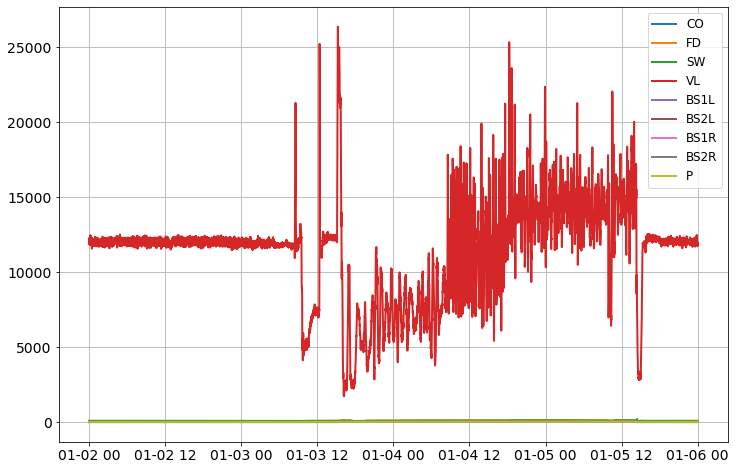

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(XY1.index,XY1['CO'],label="CO") # CO-Emissionen Minutenwerte
plt.plot(XY1.index,XY1['FD'],label="FD") # Menge FD
plt.plot(XY1.index,XY1['SW'],label="SW") # Menge Speisewasser SW
plt.plot(XY1.index,XY1['VL'],label="VL") # Menge Verbrennungsluft Wirbelgas normiert
plt.plot(XY1.index,XY1['BS1L'],label="BS1L") # Drehzahl BS Schnecke 1 links
plt.plot(XY1.index,XY1['BS2L'],label="BS2L") # Drehzahl BS Schnecke 2 links
plt.plot(XY1.index,XY1['BS1R'],label="BS1R") # Drehzahl BS Schnecke 1 rechts
plt.plot(XY1.index,XY1['BS2R'],label="BS2R") # Drehzahl BS Schnecke 2 rechts
plt.plot(XY1.index,XY1['P'],label="P")
plt.legend()

# Apply MIN/MAX - scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
XY1

,CO,FD,SW,VL,BS1L,BS2L,BS1R,BS2R,P
Datetime,,,,,,,,,
2020-01-02 00:00:00,2,76.7,80.1,11873,0,0,0,0,12.520
2020-01-02 00:01:00,2,76.7,80.1,11862,0,0,0,0,12.604
2020-01-02 00:02:00,2,76.5,80.1,12279,0,0,0,0,12.590
2020-01-02 00:03:00,2,76.6,80.0,12232,0,0,0,0,12.555
2020-01-02 00:04:00,2,76.5,80.1,12134,0,0,0,0,12.632
...,...,...,...,...,...,...,...,...,...
2020-01-05 23:56:00,1,76.8,80.4,12014,0,0,0,0,12.737
2020-01-05 23:57:00,1,76.9,80.6,11791,0,0,0,0,12.730
2020-01-05 23:58:00,1,76.9,80.4,11727,0,0,0,0,12.667


In [26]:
XY1[['CO', 'FD', 'SW', 'VL', 'BS1L', 'BS2L', 'BS1R', 'BS2R', 'P']] = scaler.fit_transform(XY1[['CO', 'FD', 'SW', 'VL', 'BS1L', 'BS2L', 'BS1R', 'BS2R', 'P']].to_numpy())

In [27]:
XY1


,CO,FD,SW,VL,BS1L,BS2L,BS1R,BS2R,P
Datetime,,,,,,,,,
2020-01-02 00:00:00,0.010,0.283557,0.263911,0.411929,0.0,0.0,0.0,0.0,0.240944
2020-01-02 00:01:00,0.010,0.283557,0.263911,0.411483,0.0,0.0,0.0,0.0,0.248206
2020-01-02 00:02:00,0.010,0.280201,0.263911,0.428403,0.0,0.0,0.0,0.0,0.246996
2020-01-02 00:03:00,0.010,0.281879,0.262321,0.426496,0.0,0.0,0.0,0.0,0.243970
2020-01-02 00:04:00,0.010,0.280201,0.263911,0.422520,0.0,0.0,0.0,0.0,0.250627
...,...,...,...,...,...,...,...,...,...
2020-01-05 23:56:00,0.005,0.285235,0.268680,0.417651,0.0,0.0,0.0,0.0,0.259704
2020-01-05 23:57:00,0.005,0.286913,0.271860,0.408602,0.0,0.0,0.0,0.0,0.259099
2020-01-05 23:58:00,0.005,0.286913,0.268680,0.406005,0.0,0.0,0.0,0.0,0.253653


In [28]:
# Rename scaled  X-& Y-Vektor
dfX1 = XY1.drop('P', axis=1)
dfY1 = XY1.loc[:,['P']]
dfX1

,CO,FD,SW,VL,BS1L,BS2L,BS1R,BS2R
Datetime,,,,,,,,
2020-01-02 00:00:00,0.010,0.283557,0.263911,0.411929,0.0,0.0,0.0,0.0
2020-01-02 00:01:00,0.010,0.283557,0.263911,0.411483,0.0,0.0,0.0,0.0
2020-01-02 00:02:00,0.010,0.280201,0.263911,0.428403,0.0,0.0,0.0,0.0
2020-01-02 00:03:00,0.010,0.281879,0.262321,0.426496,0.0,0.0,0.0,0.0
2020-01-02 00:04:00,0.010,0.280201,0.263911,0.422520,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2020-01-05 23:56:00,0.005,0.285235,0.268680,0.417651,0.0,0.0,0.0,0.0
2020-01-05 23:57:00,0.005,0.286913,0.271860,0.408602,0.0,0.0,0.0,0.0
2020-01-05 23:58:00,0.005,0.286913,0.268680,0.406005,0.0,0.0,0.0,0.0


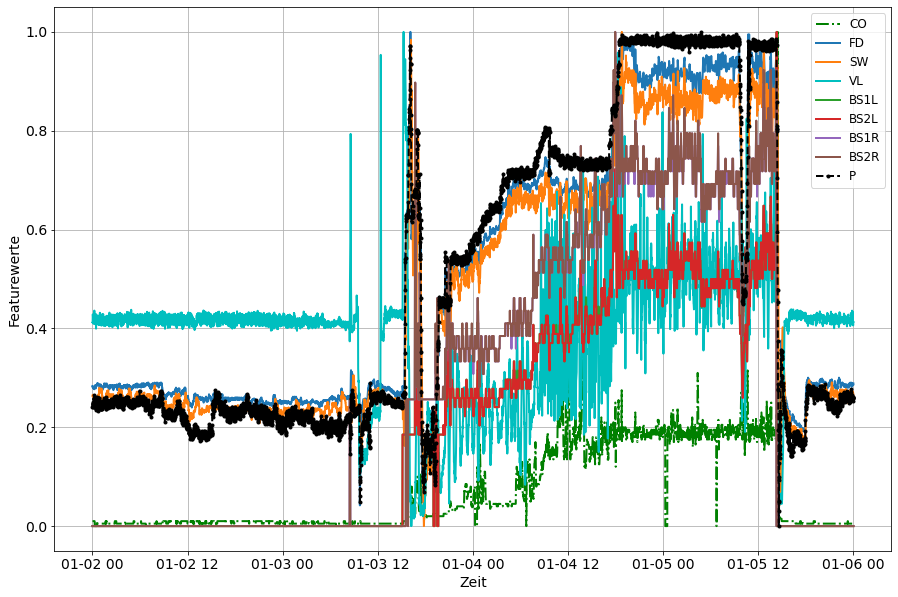

In [29]:
plt.figure(figsize=(15, 10))
plt.plot(XY1.index,XY1['CO'], 'g-.',label="CO") # CO-Emissionen Minutenwerte
plt.plot(XY1.index,XY1['FD'],label="FD") # Menge FD
plt.plot(XY1.index,XY1['SW'],label="SW") # Menge Speisewasser SW
plt.plot(XY1.index,XY1['VL'],'c-',label="VL") # Menge Verbrennungsluft Wirbelgas normiert
plt.plot(XY1.index,XY1['BS1L'],label="BS1L") # Drehzahl BS Schnecke 1 links
plt.plot(XY1.index,XY1['BS2L'],label="BS2L") # Drehzahl BS Schnecke 2 links
plt.plot(XY1.index,XY1['BS1R'],label="BS1R") # Drehzahl BS Schnecke 1 rechts
plt.plot(XY1.index,XY1['BS2R'],label="BS2R") # Drehzahl BS Schnecke 2 rechts
plt.plot(XY1.index,XY1['P'], 'k--.',label="P")
plt.xlabel("Zeit")
plt.ylabel("Featurewerte")
plt.legend()

Throughout application of MIN/MAX-scaler all data can be interpreted on one plot without crashing the y-axis.

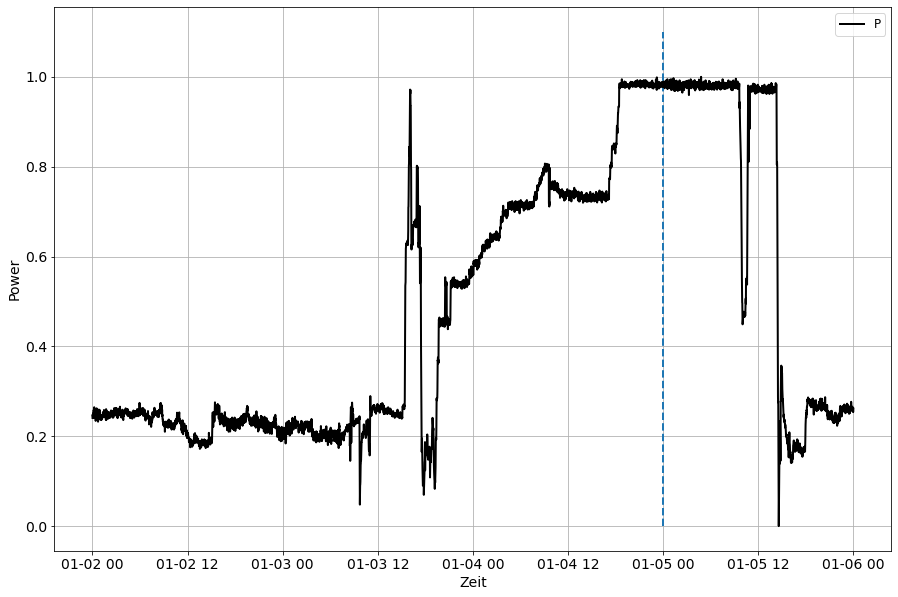

In [30]:
plt.figure(figsize=(15, 10))
plt.plot(XY1.index,XY1['P'], 'k-',label="P")
plt.vlines(Y.index[5760], 0, 1.1, linestyle='--')
plt.xlabel("Zeit")
plt.ylabel("Power")
plt.legend()

# Recheck scatter plot and correlation matrix on scaled data

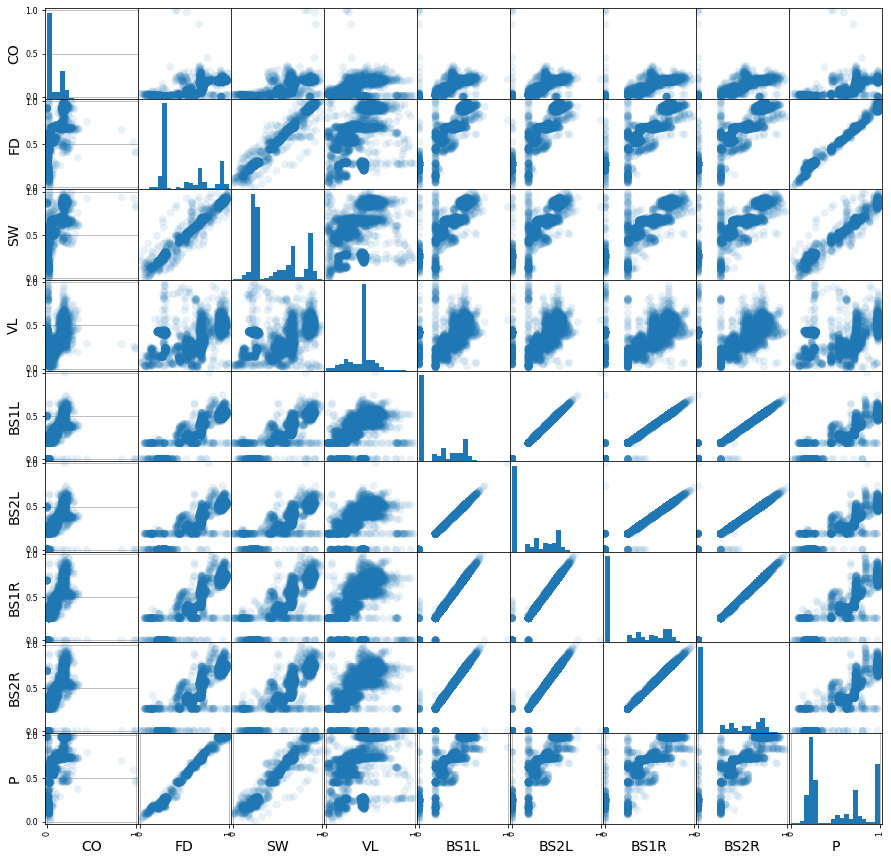

In [31]:
# create a scatter matrix from the dataframe XY with target vektor
pd.plotting.scatter_matrix(XY1,
                           figsize=(15, 15), marker='o', 
                           hist_kwds={'bins': 20}, s=60, alpha=0.1, 
                           cmap=plt.get_cmap('coolwarm'));

In [32]:
XY1.corr()

,CO,FD,SW,VL,BS1L,BS2L,BS1R,BS2R,P
CO,1.000000,0.857239,0.866680,0.292324,0.875213,0.875129,0.874443,0.874838,0.863388
FD,0.857239,1.000000,0.991454,0.252048,0.956157,0.956160,0.953814,0.953952,0.996612
SW,0.866680,0.991454,1.000000,0.227045,0.948412,0.948405,0.946669,0.946790,0.990133
VL,0.292324,0.252048,0.227045,1.000000,0.196104,0.196536,0.177233,0.177715,0.227259
BS1L,0.875213,0.956157,0.948412,0.196104,1.000000,0.999902,0.993114,0.993002,0.963431
BS2L,0.875129,0.956160,0.948405,0.196536,0.999902,1.000000,0.993025,0.992942,0.963399
BS1R,0.874443,0.953814,0.946669,0.177233,0.993114,0.993025,1.000000,0.999792,0.961128
BS2R,0.874838,0.953952,0.946790,0.177715,0.993002,0.992942,0.999792,1.000000,0.961283
P,0.863388,0.996612,0.990133,0.227259,0.963431,0.963399,0.961128,0.961283,1.000000


Result is the same as on not scaled data: Significant correlation > 0.9 to Power output consists with FD,SW and BSXX but not with VL and CO-emission. X and Y Vektor Matrix scaled together and in the same way.

## Preprocessing data finished.

_________________________________________________________

# 2) Supervised learning:

# Knowing your task and knowing your data¶

+ What question(s) am I trying to answer? Do I think the data collected can answer that question? --> Predict power output with feature matrix. YES.  
+ What is the best way to phrase my question(s) as a machine learning problem? --> Evaluate wich algorithm can predict the power output with the best accuracy  -> test score of regressors
+ Have I collected enough data to represent the problem I want to solve? --> Probably to much.
+ What features of the data did I extract, and will these enable the right predictions? --> Maybe some features can be skipped. BSXX, CO or VL. Referring to scatter plot and corr-matrix.
+ How will I measure success in my application? --> Test score on predicting power output = dfY1 with feature matrix dfX1.


# k-Neighbors Regression

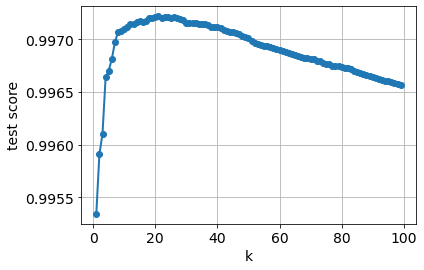

In [33]:
# import KNeighborsRegressor function:
from sklearn.neighbors import KNeighborsRegressor

# load data, only "Frischdampf" and 'Power':
X= dfX1[['FD']][:]
y= dfY1

# split the wave dataset into a training and a test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model, set the number of neighbors to consider to 3:
#reg = KNeighborsRegressor(n_neighbors=3)

# Fit the model using the training data and training targets:
#reg.fit(X_train, y_train)

k_ = range(1,100)
score_test = []
for k in k_:
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    score_test.append(reg.score(X_test, y_test))
    
plt.plot(k_, score_test, 'o-')
plt.xlabel('k')
plt.ylabel('test score')
plt.grid(True)

In [34]:
# Instantiate the model, set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=20)
# Fit the model using the training data and training targets:
reg.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=20)

In [35]:
print(f"Test set predictions:\n{reg.predict(X_test)}")
reg.predict(X_test).shape

Test set predictions:
[[0.25153454]
 [0.24934728]
 [0.21615371]
 ...
 [0.22287542]
 [0.73800035]
 [0.45347973]]


(1441, 1)

In [36]:

print(f"Test set R^2: {reg.score(X_test, y_test):.3f}")
score =reg.score

Test set R^2: 0.997


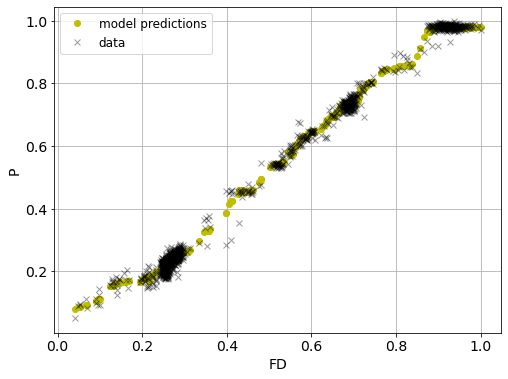

In [37]:
plt.figure(figsize=(8,6))
#plt.scatter(dfX1.FD, dfX1.SW, color='b',  label='data')
plt.plot(X_test, reg.predict(X_test), 'yo', label="model predictions")
plt.plot(X_test,y_test, 'kx', label="data", alpha=0.4)
plt.xlabel('FD')
plt.ylabel('P')
plt.legend()
#plt.grid(True)

# Linear Regression aka Ordinary Least Squares¶


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression

X= dfX1[['FD']][:]
y= dfY1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

In [39]:
print(f"lr.coef_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")

lr.coef_: [[1.1362147]]
lr.intercept_: [-0.06401394]


In [40]:
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test     set score: {lr.score(X_test, y_test):.2f}")

Training set score: 0.99
Test     set score: 0.99


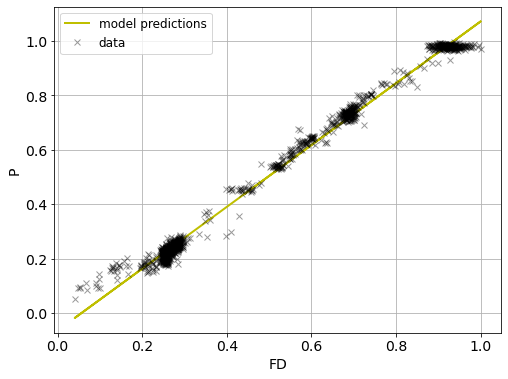

In [41]:
plt.figure(figsize=(8,6))
#plt.scatter(dfX1.FD, dfX1.SW, color='b',  label='data')
plt.plot(X_test, lr.predict(X_test), 'y-', label="model predictions")
plt.plot(X_test,y_test, 'kx', label="data", alpha=0.4)
plt.xlabel('FD')
plt.ylabel('P')
plt.legend()
#plt.grid(True)

# Regularization with Ridge Regression¶


In [42]:
from sklearn.linear_model import Ridge

X= dfX1[['FD']][:]
y= dfY1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ridge = Ridge(alpha=1).fit(X_train, y_train)   # default alpha=1.0 --> try different alphas

print(f"Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Test     set score: {ridge.score(X_test, y_test):.2f}")

Training set score: 0.99
Test     set score: 0.99


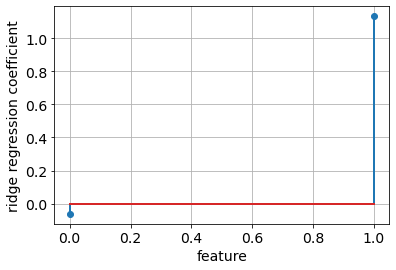

In [43]:
plt.stem(np.concatenate( ([ridge.intercept_], ridge.coef_) ), use_line_collection=True)
#plt.ylim(-20, 20)
plt.xlabel('feature')
plt.ylabel('ridge regression coefficient')
plt.grid(True)

In [44]:
print(f"ridge.coef_: {ridge.coef_}")
print(f"ridge.intercept_: {ridge.intercept_}")

ridge.coef_: [[1.13269309]]
ridge.intercept_: [-0.06227899]


In [45]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print(f"Training set score: {ridge10.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge10.score(X_test, y_test):.2f}")

Training set score: 0.99
Test set score: 0.99


In [46]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print(f"Training set score: {ridge01.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge01.score(X_test, y_test):.2f}")

Training set score: 0.99
Test set score: 0.99


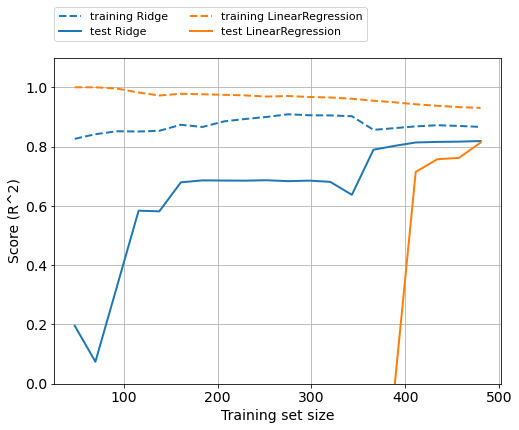

In [47]:
plt.figure(figsize=(8,6))
mglearn.plots.plot_ridge_n_samples()
plt.grid(True)


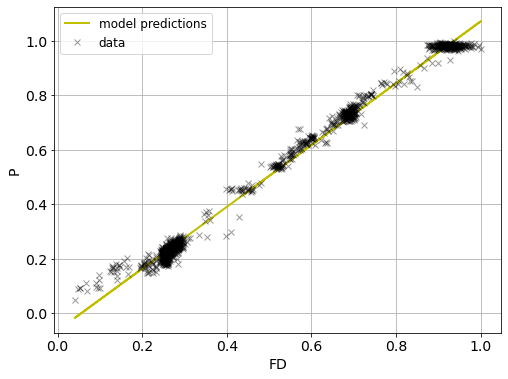

In [48]:
plt.figure(figsize=(8,6))
#plt.scatter(dfX1.FD, dfX1.SW, color='b',  label='data')
plt.plot(X_test, ridge.predict(X_test), 'y-', label="model predictions")
plt.plot(X_test,y_test, 'kx', label="data", alpha=0.4)
plt.xlabel('FD')
plt.ylabel('P')
plt.legend()
#plt.grid(True)

# Regularization with Lasso Regression¶


Training set score: 0.87
Test     set score: 0.87
Number of features used: 1
[0.13449454]
[0.73328031]


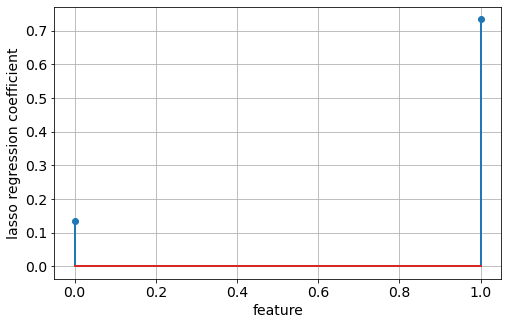

In [49]:
from sklearn.linear_model import Lasso

X= dfX1[['FD']][:]
y= dfY1

#alternate alpha and see how lasso coefficients alternate -> alpha >> bad model
lasso = Lasso(alpha=0.03).fit(X_train, y_train) # default alpha = 1

print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test     set score: {lasso.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

print(lasso.intercept_)
print(lasso.coef_)


plt.figure(figsize=(8,5))
plt.stem(np.concatenate( (lasso.intercept_, lasso.coef_) ), use_line_collection=True)
plt.xlabel('feature')
plt.ylabel('lasso regression coefficient')
plt.grid(True)


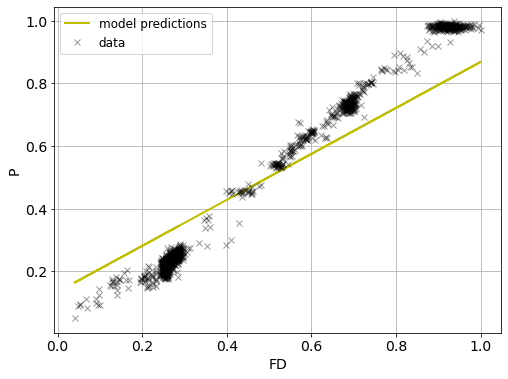

In [50]:
plt.figure(figsize=(8,6))
#plt.scatter(dfX1.FD, dfX1.SW, color='b',  label='data')
plt.plot(X_test, lasso.predict(X_test), 'y-', label="model predictions")
plt.plot(X_test,y_test, 'kx', label="data", alpha=0.4)
plt.xlabel('FD')
plt.ylabel('P')
plt.legend()
#plt.grid(True)

# DecisionTreeRegressor

In [51]:
#dfX1

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Use historical data to forecast prices after the year 2000
X= dfX1[['FD']][:]
y= dfY1


# Makte train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tree       = DecisionTreeRegressor(max_depth=None).fit(X_train, y_train)
#tree       = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
#X_all = dfX1.values, ((0, 1))

pred_tree = tree.predict(X_test)
pred_lr   = linear_reg.predict(X_test)



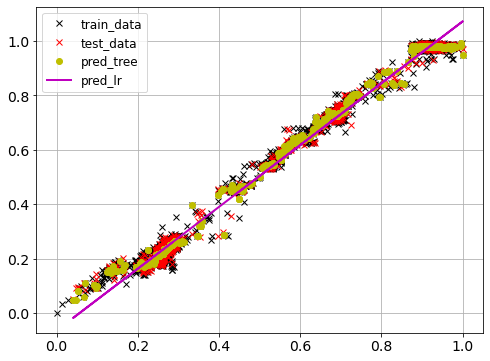

In [53]:
plt.figure(figsize=(8,6))
plt.plot(X_train, y_train,'kx', label="train_data")
plt.plot(X_test, y_test,'rx', label="test_data")
plt.plot(X_test, pred_tree,'yo', label="pred_tree")
plt.plot(X_test, pred_lr,'m-', label="pred_lr")
#plt.semilogy(ram_prices.date, price_tree      , '.-', label="tree prediction")
#plt.semilogy(ram_prices.date, price_lr        , '--', label="linear prediction")
plt.legend()
plt.grid(True)

The DecisionTreeRegressor is not able to extrapolate. It is actually possible to make very good forecasts with tree-based models (for example, when trying to predict whether a price will go up or down). The point of this example was not to show that trees are a bad model for time series, but to illustrate a particular property of how trees make predictions.

# Predicting Power and comparison of regressors

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble     import RandomForestRegressor
from sklearn.linear_model import Ridge

In [55]:
#plt.figure(figsize=(12, 5))
#my_xticks = dfX1[['FD'].date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
#plt.xticks(my_xticks, my_xticks.strftime("%a %m-%d"), rotation=90, ha="left")
#plt.plot(citibike, linewidth=1)
#plt.xlabel("Date")
#plt.ylabel("Rentals");

In [56]:
# Set the time series to train the algorithm --> evaluate impact on R^2
n_train = 2000#3000#4000 # #MAX 5761 # Compare all the Regressors on different Time Series Splits

X= dfX1#[['VL']][:]  # either the full feature matrxi can be applied, or separate columns
y= dfY1['P']
print(X)
# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    
    # split the given features into a training and test set
    X_train, X_test = features[:n_train], features[n_train:]
    # split also the 
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print(f"Test-set R^2: {regressor.score(X_test, y_test):.2f}")
    y_pred       = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    
    plt.figure(figsize=(12, 5))
    #plt.xticks(range(0, len(X), 8), my_xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, 'r--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, 'c--', label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Zeit / Minuten")
    plt.ylabel("Power / % ")
    X

                        CO        FD        SW        VL  BS1L  BS2L  BS1R  \
Datetime                                                                     
2020-01-02 00:00:00  0.010  0.283557  0.263911  0.411929   0.0   0.0   0.0   
2020-01-02 00:01:00  0.010  0.283557  0.263911  0.411483   0.0   0.0   0.0   
2020-01-02 00:02:00  0.010  0.280201  0.263911  0.428403   0.0   0.0   0.0   
2020-01-02 00:03:00  0.010  0.281879  0.262321  0.426496   0.0   0.0   0.0   
2020-01-02 00:04:00  0.010  0.280201  0.263911  0.422520   0.0   0.0   0.0   
...                    ...       ...       ...       ...   ...   ...   ...   
2020-01-05 23:56:00  0.005  0.285235  0.268680  0.417651   0.0   0.0   0.0   
2020-01-05 23:57:00  0.005  0.286913  0.271860  0.408602   0.0   0.0   0.0   
2020-01-05 23:58:00  0.005  0.286913  0.268680  0.406005   0.0   0.0   0.0   
2020-01-05 23:59:00  0.005  0.285235  0.268680  0.414242   0.0   0.0   0.0   
2020-01-06 00:00:00  0.005  0.288591  0.265501  0.413350   0.0  

Test-set R^2: -1.68


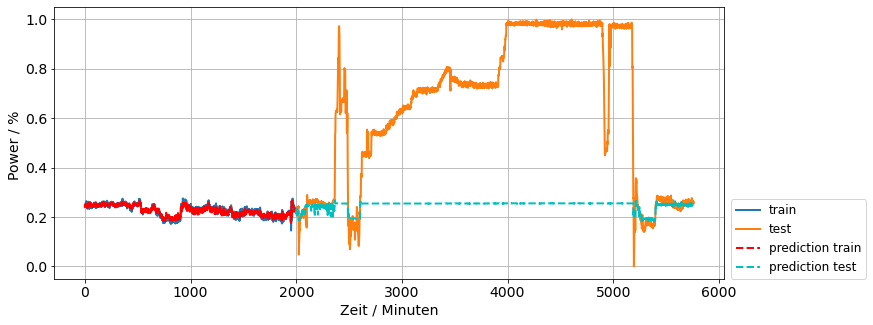

In [57]:
RF_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, RF_regressor)

Test-set R^2: 0.74


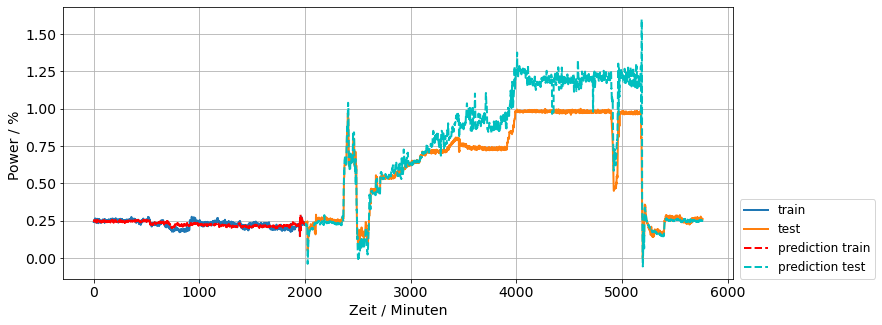

In [58]:
lr = LinearRegression()
eval_on_features(X, y, lr)

Test-set R^2: 0.98


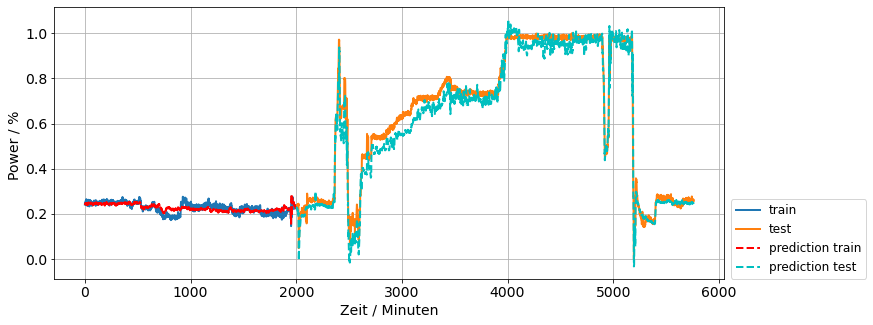

In [59]:
ridge = Ridge(alpha=0.03)
eval_on_features(X, y, ridge)

Test-set R^2: 0.93


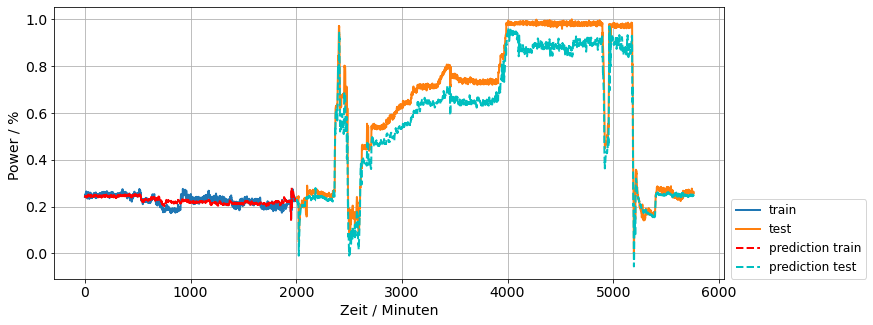

In [60]:
LassoReg = Lasso(alpha=0.00001)
eval_on_features(X, y, LassoReg)

Test-set R^2: -1.57


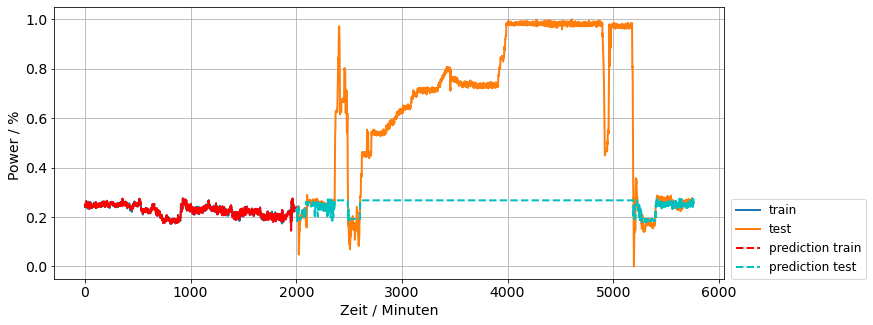

In [61]:
DecisionTree = DecisionTreeRegressor()
eval_on_features(X, y, DecisionTree)

# 3) MODEL EVALUATION, Grid Search- CV

## RandomForestRegressor & RidgeRegression to be evaluated and compared

For regression, scikit-learn uses the standard k-fold cross-validation by default.



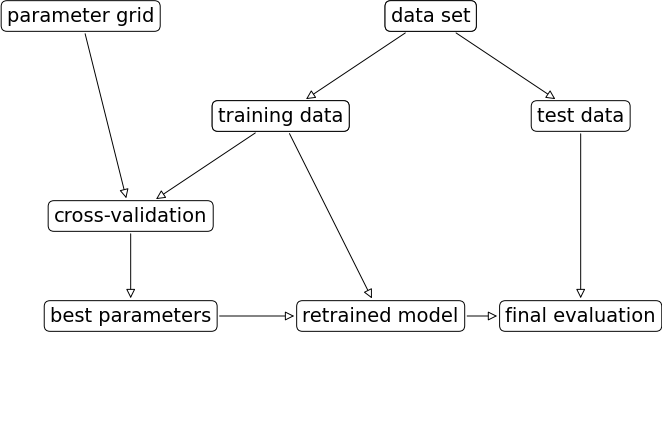

In [62]:
mglearn.plots.plot_grid_search_overview()
from sklearn.model_selection import GridSearchCV

# The danger of overfitting the parameters and the validation set¶


![threefold_split](Validation.png)

# Random Forest Regressor - Evaluation

Evaluate size of test range on R^2

In [63]:
# Set the time series to train the algorithm --> evaluate impact on R^2
n_train1 = [2000, 2500, 3000, 3500]#2000 # #MAX 5761

# Split into validation and evaluation sets:
X_validation= dfX1[0:4500]#[['BS2R']][:]
y_validation= dfY1[0:4500]['P']
X_eval_test=dfX1[4501:5760]#[['BS2R']][:]
y_eval_test=dfY1[4501:5760]['P']


# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    for n_train in n_train1:
            # split the given features into a training and test set
        X_train, X_test = features[:n_train], features[n_train:]
        # split also the 
        y_train, y_test = target[:n_train], target[n_train:]

        regressor.fit(X_train, y_train)
        print(f"Test-set R^2: {regressor.score(X_test, y_test):.2f}")
        y_pred       = regressor.predict(X_test)
        y_pred_train = regressor.predict(X_train)

        print(f"Training set score: {regressor.score(X_train, y_train):.2f}")
        print(f"Test set score: {regressor.score(X_test, y_test):.2f}")

        plt.figure(figsize=(12, 5))
        #plt.xticks(range(0, len(X), 8), my_xticks.strftime("%a %m-%d"), rotation=90, ha="left")
        plt.plot(range(n_train), y_train, label="train")
        plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
        plt.plot(range(n_train), y_pred_train, 'r--', label="prediction train")
        plt.plot(range(n_train, len(y_test) + n_train), y_pred, 'c--', label="prediction test")
        plt.vlines(n_train, 0, 1.1, linestyle='--')
        plt.legend(loc=(1.01, 0))
        plt.xlabel("Zeit / Minuten")
        plt.ylabel("Power ")
        plt.title(f"R^2 = {regressor.score(X_test, y_test):.2f}"f", Time-Series-Split in Minuten = {n_train}")
        X


In [64]:
#X_eval_test

Test-set R^2: -2.38
Training set score: 0.93
Test set score: -2.38
Test-set R^2: 0.95
Training set score: 1.00
Test set score: 0.95
Test-set R^2: 0.79
Training set score: 1.00
Test set score: 0.79
Test-set R^2: 0.74
Training set score: 1.00
Test set score: 0.74


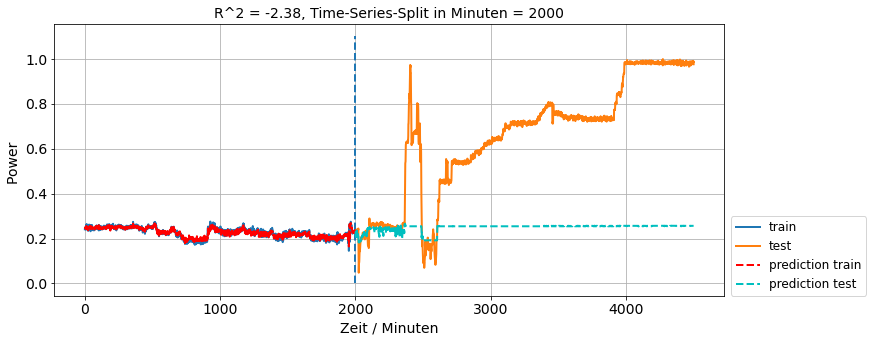

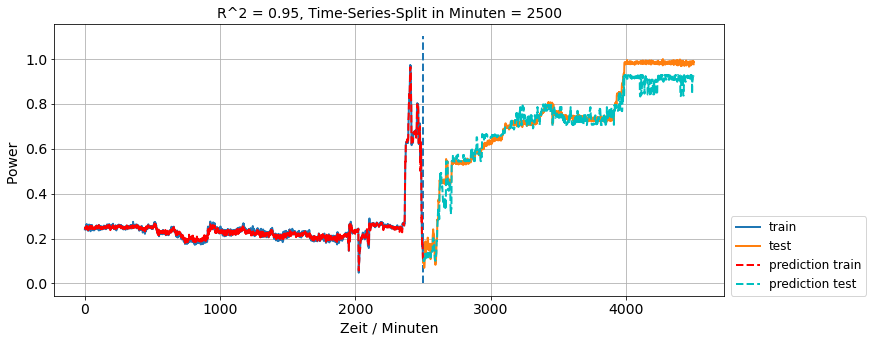

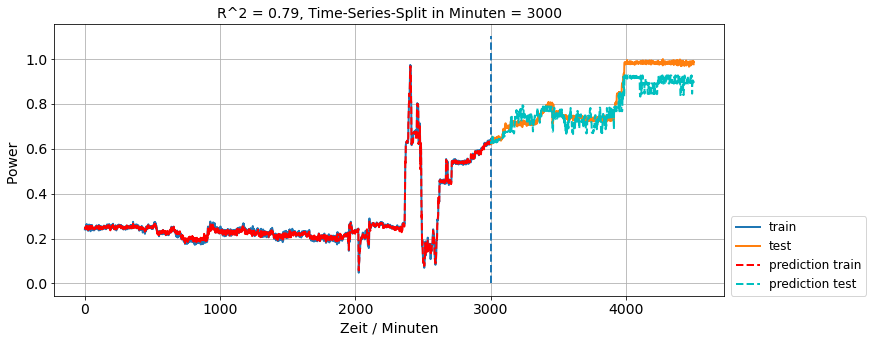

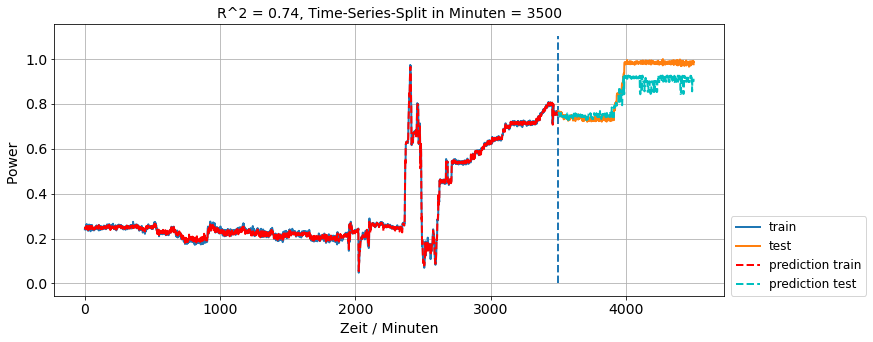

In [65]:
RF_regressor = RandomForestRegressor(random_state=None)
eval_on_features(X_validation, y_validation, RF_regressor)

# Validate algorithm and conduct best parameters

In [66]:
param_grid = {'n_estimators': [10,25, 50 ,75, 100, 200, 300]}
print(f"Parameter grid:\n{param_grid}")

grid_search = GridSearchCV(RandomForestRegressor(), 
                           param_grid, 
                           cv=5, 
                           return_train_score=True)

print(f"Size of training set: {X_train.shape[0]}\n\
Size of validation set: {X_validation.shape[0]}\n\
Size of test set: {X_test.shape[0]}")


X_train, X_test, y_train, y_test = train_test_split(X_validation, y_validation, random_state=0)

grid_search.fit(X_train, y_train)

print(f"Test set score: {grid_search.score(X_test, y_test):.2f}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

print(f"Best estimator:\n{grid_search.best_estimator_}")



Parameter grid:
{'n_estimators': [10, 25, 50, 75, 100, 200, 300]}
Size of training set: 4320
Size of validation set: 4500
Size of test set: 1441
Test set score: 1.00
Best parameters: {'n_estimators': 300}
Best cross-validation score: 1.00
Best estimator:
RandomForestRegressor(n_estimators=300)


# Analyzing the result of cross-validation¶


In [67]:
# convert to Dataframe
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)

results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.097858,0.005555,0.004986,0.000620,10,{'n_estimators': 10},0.997011,0.996790,0.996739,0.997009,...,0.997007,0.000264,7,0.999478,0.999544,0.999551,0.999521,0.999562,0.999531,0.000029
1,0.240302,0.005978,0.007965,0.000620,25,{'n_estimators': 25},0.997081,0.997345,0.997067,0.997301,...,0.997293,0.000221,5,0.999599,0.999585,0.999642,0.999561,0.999595,0.999596,0.000026
2,0.502442,0.033547,0.013970,0.000893,50,{'n_estimators': 50},0.997042,0.997276,0.997126,0.997327,...,0.997280,0.000202,6,0.999616,0.999637,0.999647,0.999627,0.999646,0.999635,0.000012
3,0.714320,0.029044,0.017754,0.000399,75,{'n_estimators': 75},0.997126,0.997381,0.997070,0.997439,...,0.997343,0.000227,4,0.999628,0.999631,0.999656,0.999643,0.999659,0.999643,0.000013
4,0.995490,0.065641,0.023903,0.001477,100,{'n_estimators': 100},0.997317,0.997398,0.997136,0.997350,...,0.997380,0.000182,3,0.999628,0.999616,0.999675,0.999632,0.999661,0.999642,0.000022
5,1.949069,0.034619,0.043297,0.000799,200,{'n_estimators': 200},0.997284,0.997459,0.997102,0.997525,...,0.997411,0.000201,2,0.999645,0.999644,0.999679,0.999649,0.999663,0.999656,0.000013
6,3.017819,0.080507,0.069286,0.006341,300,{'n_estimators': 300},0.997309,0.997451,0.997122,0.997510,...,0.997416,0.000191,1,0.999639,0.999643,0.999682,0.999644,0.999673,0.999656,0.000018


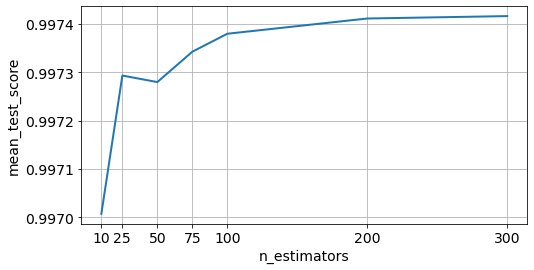

In [68]:
plt.figure(figsize=(8, 4))
plt.plot(param_grid['n_estimators'], results.mean_test_score)
plt.xticks(param_grid['n_estimators'])
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')
plt.grid(True)

# Evaluation - Test modified algorithm on "new" evaluation data set

Implement the best parameters result of chapter 'Validate algorithm and conduct best parameters' manually to variable clf = ....... --> see # comment

In [69]:
# rebuild a model on the combined training and validation set
# and evaluate it on the test set
clf = RandomForestRegressor(n_estimators=200) # implenemt best conducted parameter
clf.fit(X_validation, y_validation)
test_score = clf.score(X_eval_test, y_eval_test)
y_pred       = clf.predict(X_eval_test)

print(f"Test-set R^2: {clf.score(X_eval_test, y_eval_test):.3f}")

Test-set R^2: 0.997


Text(0.5, 1.0, 'R^2 = 1.00')

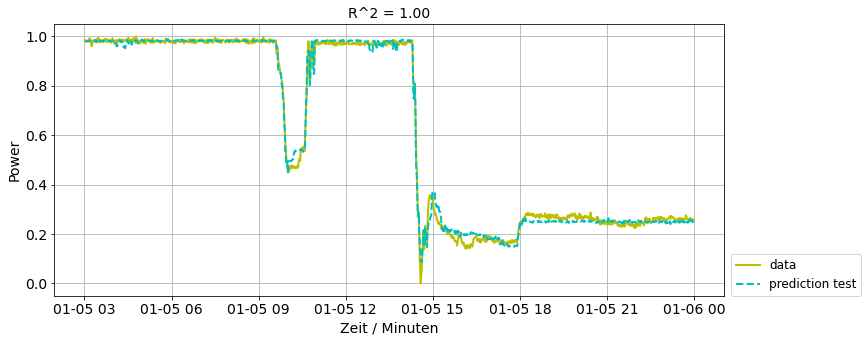

In [70]:
plt.figure(figsize=(12, 5))
#plt.xticks(range(0, len(X), 8), my_xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(X_eval_test.index, y_eval_test, 'y-', label="data")
plt.plot(X_eval_test.index, y_pred, 'c--', label="prediction test")
#plt.plot(range(n_train), y_test, label="train")
plt.legend(loc=(1.01, 0))
plt.xlabel("Zeit / Minuten")
plt.ylabel("Power")
plt.title(f"R^2 = {clf.score(X_test, y_test):.2f}")
                                    
                                     


# Ridge Regression

In [71]:
# Set the time series to train the algorithm --> evaluate impact on R^2
n_train1 = [2000, 2500, 3000, 3500]#2000 # #MAX 5761

# Split into validation and evaluation sets:
X_validation= dfX1[0:4500]#[['VL']][:]
y_validation= dfY1[0:4500]['P']
X_eval_test=dfX1[4501:5760]
y_eval_test=dfY1[4501:5760]['P']


# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    for n_train in n_train1:
            # split the given features into a training and test set
        X_train, X_test = features[:n_train], features[n_train:]
        # split also the 
        y_train, y_test = target[:n_train], target[n_train:]

        regressor.fit(X_train, y_train)
        print(f"Test-set R^2: {regressor.score(X_test, y_test):.2f}")
        y_pred       = regressor.predict(X_test)
        y_pred_train = regressor.predict(X_train)

        print(f"Training set score: {regressor.score(X_train, y_train):.2f}")
        print(f"Test set score: {regressor.score(X_test, y_test):.2f}")
        
        plt.figure(figsize=(12, 5))
        #plt.xticks(range(0, len(X), 8), my_xticks.strftime("%a %m-%d"), rotation=90, ha="left")
        plt.plot(range(n_train), y_train, label="train")
        plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
        plt.plot(range(n_train), y_pred_train, 'r--', label="prediction train")
        plt.plot(range(n_train, len(y_test) + n_train), y_pred, 'c--', label="prediction test")
        plt.vlines(n_train, 0, 1.1, linestyle='--')
        plt.legend(loc=(1.01, 0))
        plt.xlabel("Zeit / Minuten")
        plt.ylabel("Power ")
        plt.title(f"R^2: {regressor.score(X_test, y_test):.2f}"f", Time-Series-Split in Minuten: {n_train}")
        plt.title(f"R^2 = {regressor.score(X_test, y_test):.2f}"f", Time-Series-Split in Minuten = {n_train}")
        X


Test-set R^2: -0.66
Training set score: 0.29
Test set score: -0.66
Test-set R^2: 0.93
Training set score: 0.96
Test set score: 0.93
Test-set R^2: 0.90
Training set score: 0.98
Test set score: 0.90
Test-set R^2: 0.87
Training set score: 0.99
Test set score: 0.87


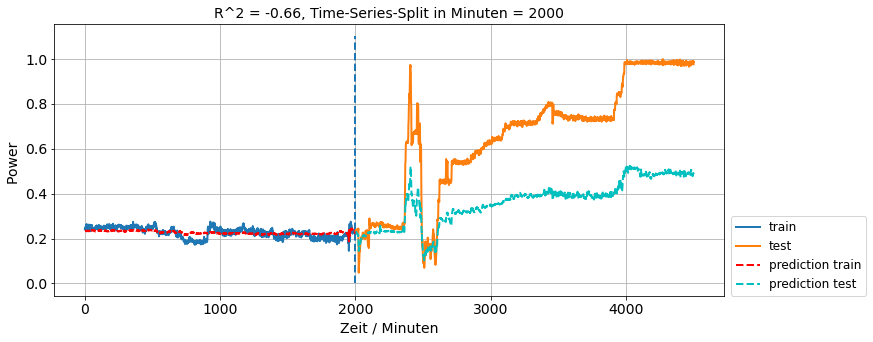

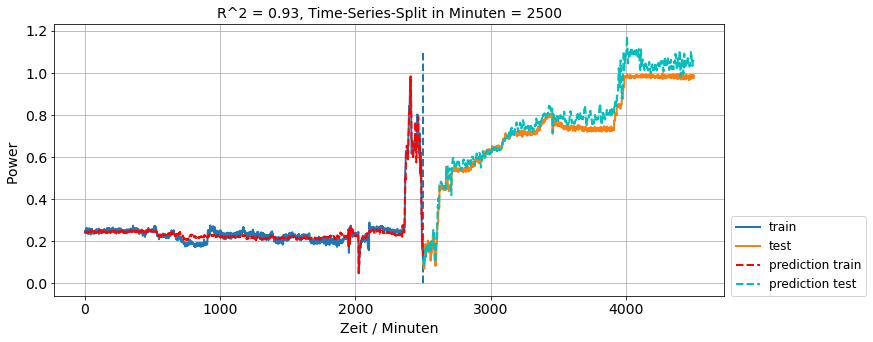

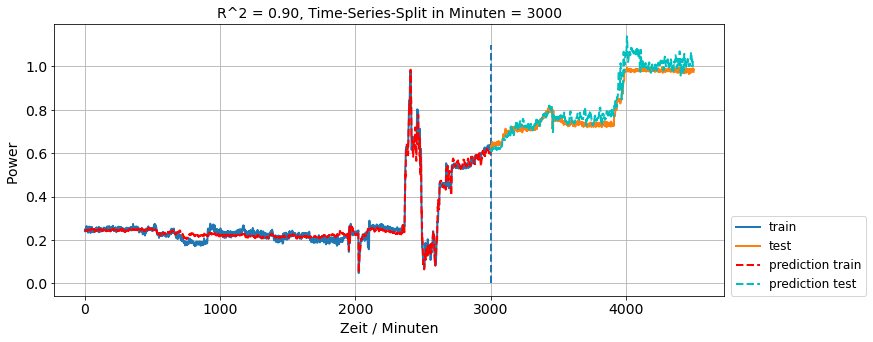

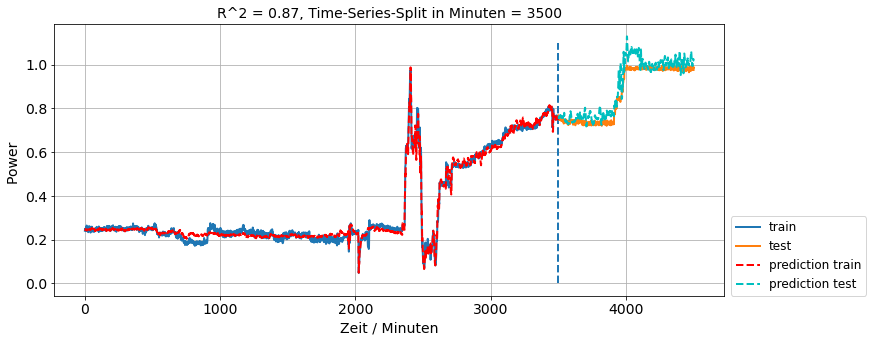

In [72]:
ridge = Ridge()#(alpha=0.03)
eval_on_features(X_validation, y_validation, ridge)

# Validate algorithm and conduct best parameters

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {'alpha': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,0.08,0.09,0.1]}
print(f"Parameter grid:\n{param_grid}")

Parameter grid:
{'alpha': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]}


In [75]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(Ridge(),
                           param_grid,
                           cv=5, 
                           return_train_score=True)

print(f"Size of training set: {X_train.shape[0]}\n\
Size of validation set: {X_validation.shape[0]}\n\
Size of test set: {X_test.shape[0]}")

X_train, X_test, y_train, y_test = train_test_split(X_validation, y_validation, random_state=0)

grid_search.fit(X_train, y_train)



Size of training set: 3375
Size of validation set: 4500
Size of test set: 1125


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                                   0.08, 0.09, 0.1]},
             return_train_score=True)

In [76]:
print(f"Test set score: {grid_search.score(X_test, y_test):.2f}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Test set score: 0.99
Best parameters: {'alpha': 0.04}
Best cross-validation score: 0.99


# Analyzing the result of cross-validation

In [77]:
# convert to Dataframe
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)

results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004189,0.000747,0.002187,0.000738,0.01,{'alpha': 0.01},0.994006,0.994699,0.994169,0.993765,...,0.994149,0.000308,8,0.994292,0.994124,0.994260,0.994350,0.994245,0.994254,0.000075
1,0.002992,0.000631,0.001795,0.000398,0.02,{'alpha': 0.02},0.994003,0.994711,0.994173,0.993762,...,0.994152,0.000313,5,0.994291,0.994122,0.994258,0.994349,0.994244,0.994253,0.000075
2,0.003191,0.000747,0.001995,0.000631,0.03,{'alpha': 0.03},0.993999,0.994720,0.994174,0.993760,...,0.994153,0.000317,3,0.994290,0.994120,0.994256,0.994348,0.994243,0.994251,0.000075
3,0.003391,0.000798,0.002394,0.000488,0.04,{'alpha': 0.04},0.993994,0.994728,0.994174,0.993757,...,0.994153,0.000321,1,0.994288,0.994118,0.994254,0.994346,0.994242,0.994249,0.000075
4,0.003591,0.000489,0.002393,0.000489,0.05,{'alpha': 0.05},0.993989,0.994736,0.994172,0.993755,...,0.994153,0.000325,2,0.994286,0.994115,0.994252,0.994344,0.994240,0.994248,0.000075
5,0.003192,0.000399,0.001795,0.000746,0.06,{'alpha': 0.06},0.993984,0.994743,0.994171,0.993752,...,0.994152,0.000328,4,0.994284,0.994113,0.994250,0.994342,0.994238,0.994246,0.000075
6,0.003790,0.000747,0.001995,0.000631,0.07,{'alpha': 0.07},0.993978,0.994749,0.994168,0.993749,...,0.994151,0.000332,6,0.994282,0.994111,0.994247,0.994340,0.994236,0.994243,0.000076
7,0.002792,0.000399,0.002394,0.000488,0.08,{'alpha': 0.08},0.993972,0.994754,0.994166,0.993746,...,0.994150,0.000335,7,0.994280,0.994108,0.994245,0.994338,0.994234,0.994241,0.000076
8,0.003191,0.000746,0.002194,0.000977,0.09,{'alpha': 0.09},0.993966,0.994760,0.994163,0.993743,...,0.994149,0.000339,9,0.994278,0.994105,0.994242,0.994336,0.994232,0.994239,0.000076
9,0.003590,0.000798,0.002593,0.000488,0.1,{'alpha': 0.1},0.993960,0.994765,0.994160,0.993739,...,0.994148,0.000342,10,0.994275,0.994103,0.994240,0.994333,0.994229,0.994236,0.000076


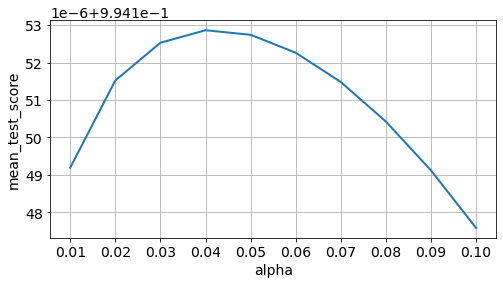

In [78]:
plt.figure(figsize=(8, 4))
plt.plot(param_grid['alpha'], results.mean_test_score)
plt.xticks(param_grid['alpha'])
plt.xlabel('alpha')
plt.ylabel('mean_test_score')
plt.grid(True)

# Evaluation: Test modified algorithm on "new" evaluation data set

In [79]:
# rebuild a model on the combined training and validation set
# and evaluate it on the test set
clf = Ridge(alpha=0.04) # implenemt best parameter
clf.fit(X_validation, y_validation)
test_score = clf.score(X_eval_test, y_eval_test)
y_pred       = clf.predict(X_eval_test)

print(f"Test-set R^2: {clf.score(X_eval_test, y_eval_test):.3f}")

Test-set R^2: 0.996


Text(0.5, 1.0, 'Test-set R^2: 0.996')

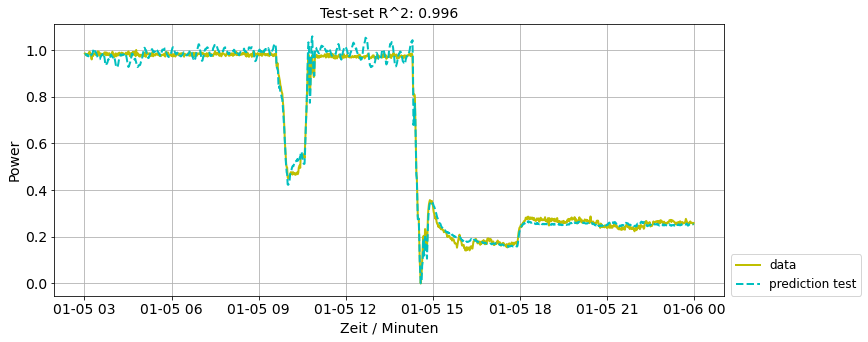

In [80]:
plt.figure(figsize=(12, 5))
#plt.xticks(range(0, len(X), 8), my_xticks.strftime("%a %m-%d"), rotation=90, ha="left")

plt.plot(X_eval_test.index, y_eval_test, 'y-', label="data")
plt.plot(X_eval_test.index, y_pred, 'c--', label="prediction test")
#plt.plot(range(n_train), y_test, label="train")
plt.legend(loc=(1.01, 0))
plt.xlabel("Zeit / Minuten")
plt.ylabel("Power")
plt.title(f"Test-set R^2: {clf.score(X_eval_test, y_eval_test):.3f}")


In [81]:
#ENDE